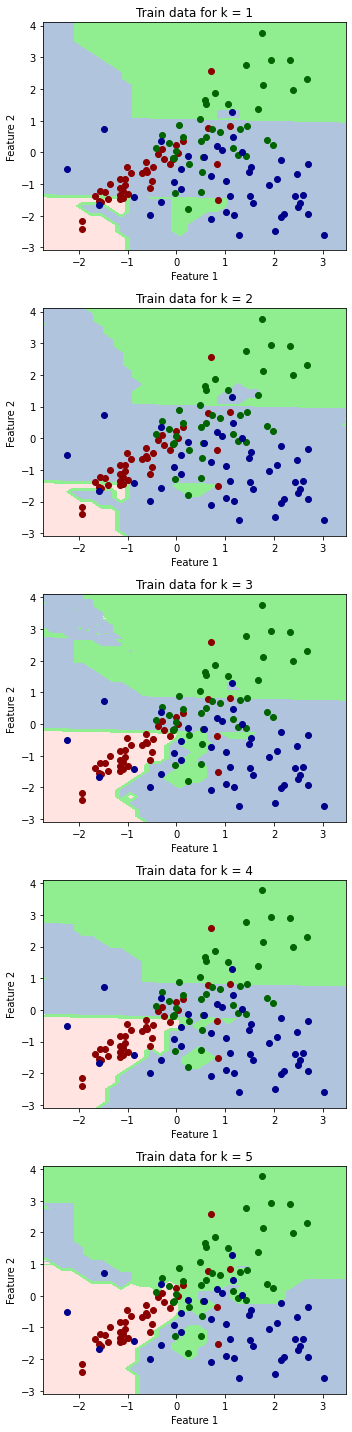

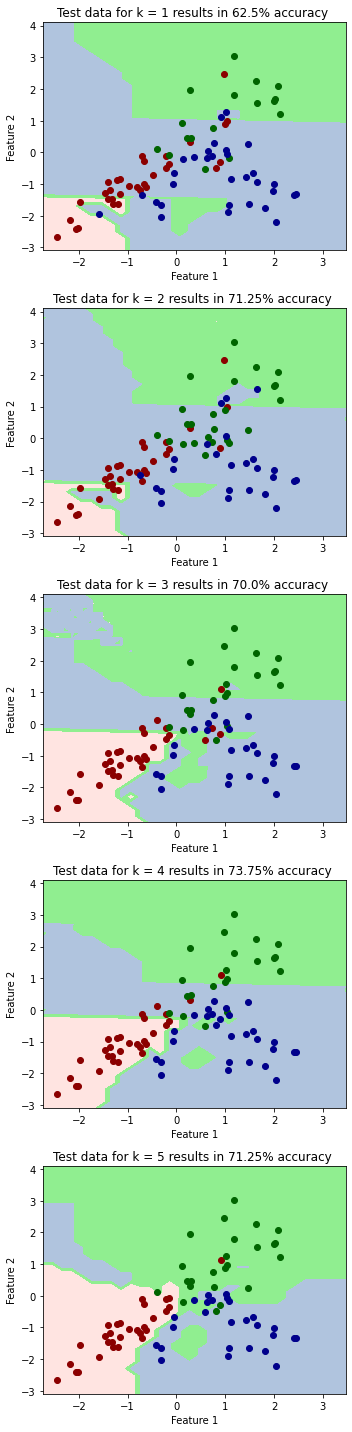

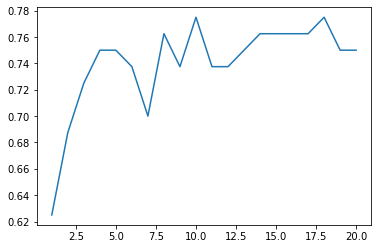

In [2]:
#Filename: HW3_kNN_skeleton.py
#Author: Harald Leisenberger
#Edited: May, 2023

import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.datasets import load_diabetes

#--------------------------------------------------------------------------------
# Assignment 3 - Section 2 (k-Nearest Neighbors)
#--------------------------------------------------------------------------------

def main():    
    
    
    # !!! All undefined functions should be implemented in the section 'Helper Functions' !!!
    
    
    # 2.1 kNN for Classification
    # ----------------------------------------------
    
    # Load the two data arrays (training set: 120 x 3 - array, test set: 80 x 3 - array)
    # Column 1: feature 1; Column 2: feature 2; Column 3: class label (0, 1 or 2)
    data_training = np.loadtxt('HW3_kNN_training.data')
    data_test = np.loadtxt('HW3_kNN_test.data')
    X_train = data_training[:,0:2]
    t_train = data_training[:,2]
    X_test = data_test[:,0:2]
    t_test = data_test[:,2]
    # TODO: Use the function kNN_classifyer to visualize the decision boundaries based on the training data
    #       for k=1,2,3,4,5.
    
    resolution = 0.2 #ab 0.2 wirds richtig zach
    min_x1 = min(X_train.T[0])
    min_x2 = min(X_train.T[1])
    max_x1 = max(X_train.T[0])
    max_x2 = max(X_train.T[1])
    x1_vec = np.arange(min_x1-0.5,max_x1+0.5,resolution)
    x2_vec = np.arange(min_x2-0.5,max_x2+0.5,resolution)
    x1_vec, x2_vec = np.meshgrid(x1_vec,x2_vec)
    x1_vec, x2_vec = np.meshgrid(x1_vec,x2_vec)
    dec_vec = np.array([x1_vec.ravel(),x2_vec.ravel()]).T
    levels = [-0.1, 0.9, 1.9, 3]
    
    fig,axes = plt.subplots(nrows=5,ncols=1,figsize=(5,20))
    for k in [1,2,3,4,5]:
        test_pred = kNN(X_train, t_train, 3, dec_vec , k)
        test_pred = test_pred.reshape(x1_vec.shape)
        axes[k-1].contourf(x1_vec,x2_vec,test_pred,levels,colors=('mistyrose', 'lightgreen', 'lightsteelblue'),extend='both')
        axes[k-1].scatter(X_train[t_train == 0, 0], X_train[t_train == 0, 1],color="darkred")
        axes[k-1].scatter(X_train[t_train == 1, 0], X_train[t_train == 1, 1],color="darkgreen")
        axes[k-1].scatter(X_train[t_train == 2, 0], X_train[t_train == 2, 1],color="darkblue")
        axes[k-1].set_xlabel("Feature 1")
        axes[k-1].set_ylabel("Feature 2")
        axes[k-1].set_title("Train data for k = {}".format(k))
    plt.tight_layout()
    fig,axes = plt.subplots(nrows=5,ncols=1,figsize=(5,20))
    for k in [1,2,3,4,5]:
        
        test_pred = kNN(X_train, t_train, 3, dec_vec , k)
        test_pred = test_pred.reshape(x1_vec.shape)
        axes[k-1].contourf(x1_vec,x2_vec,test_pred,levels,colors=('mistyrose', 'lightgreen', 'lightsteelblue'),extend='both')
        
        test_pred = kNN(X_train, t_train, 3, X_test , k)
        axes[k-1].scatter(X_test[test_pred == 0, 0], X_test[test_pred == 0, 1],color="darkred")
        axes[k-1].scatter(X_test[test_pred == 1, 0], X_test[test_pred == 1, 1],color="darkgreen")
        axes[k-1].scatter(X_test[test_pred == 2, 0], X_test[test_pred == 2, 1],color="darkblue")
        axes[k-1].set_xlabel("Feature 1")
        axes[k-1].set_ylabel("Feature 2")
        axes[k-1].set_title("Test data for k = {} results in {}% accuracy ".format(k,100*kNN_score(t_test,test_pred)))
    plt.tight_layout()
    
    
    fig = plt.figure()
    pred_arr = np.zeros(20)
    
    for k in range(20):
        test_pred = kNN(X_train, t_train, 3, X_test, k+1)
        pred_arr[k] = kNN_score(t_test,test_pred)
    plt.plot(range(1,21),pred_arr)
    # TODO: Use the kNN_score to compute the classification score on the test data for k=1,2,3,4,5 and plot
    #       the results.
    
    # TODO: Compute the test score for $k=1,2,...,20$ and plot it against k.
    
    
    # 2.2 kNN for Regression (Bonus)
    # ----------------------------------------------
    
    diabetes = load_diabetes()
    blood_pressure_all = diabetes.data[:,3]
    blood_pressure = blood_pressure_all[0:40]
    diabetes_value = diabetes.target[0:40]
    
    
    # TODO: Use the function two_NN_regression to fit a function that predicts the diabetes targets in dependence of
    #       the blood pressure on the interval [-0.1,0.1] and vizualize the results.
    
    pass
    
    
#--------------------------------------------------------------------------------
# Helper Functions (to be implemented!)
#--------------------------------------------------------------------------------

def kNN(X_train,t_train,nr_classes,X_new,k):
    
    
    train_len,_ = X_train.shape
    test_len,_ = X_new.shape


    label_mx = np.tile(t_train,[test_len,1])
    
    diff_vec = X_train[None, :] - X_new[:, None]
    
    euc_dist = np.linalg.norm(diff_vec,axis=2)
    min_dist = np.argsort(euc_dist)[:,0:k]

    x_idx = np.arange(0, test_len)
    x_idx = np.repeat(x_idx, k)

    y_idx = (min_dist[:,0:k]).flatten()
    min_label = label_mx[x_idx,y_idx].reshape(test_len,k)
    
    #return stats.mode(min_label,axis=1)[0].flatten()
    modes = []
    for row in min_label:
        unique, counts = np.unique(row, return_counts=True)
        max_count = np.max(counts)
        mode_values = unique[counts == max_count]
        mode_val = np.random.choice(mode_values)
        modes.append(mode_val)

    modes = np.array(modes)#.reshape(-1, 1)
    return modes


def kNN_classifyer(X_train,t_train,nr_classes,X_new,k):
    
    """ Applies k-Nearest-Neighbors to predict the value of new data based
        on the training data. 
    
    Input: X_train ... training features
           t_train ... training classes
           nr_classes ... number of classes
           X_new ... new, unseen data to be classified
           k ... number of neighbors to be taken into account for classifying new data
           
    Output: y_estimate ... estimated classes of all new data points
    """
    
    y_estimate = np.zeros(len(X_new))
    
    # TODO: Implement kNN for a general k and a general number of classes

    for idx, test_point in enumerate(X_new):
        distances = (test_point[0] - X_train[:, 0])**2 + (test_point[1] - X_train[:, 1])**2
        i_min = np.argsort(distances)
        class_count = np.bincount(t_train[i_min[0:k+1]].astype(int))
        max_class = np.where(class_count == np.max(class_count))[0]
        y_estimate = max_class[np.random.randint(0, len(max_class))]

    return y_estimate

#--------------------------------------------------------------------------------

def kNN_score(t_test,y_estimate):
    
    """ Evaluates the percentage of correctly classified data points on a test set 
    
    Input: t_test ... true classes of test samples
           y_estimate ... kNN-estimated classes of test samples
           
    Output: y_estimate ... estimated classes of all new data points
    """
    return sum(np.equal(t_test,y_estimate))/len(t_test)


#--------------------------------------------------------------------------------

def two_NN_regression(X_train,t_train,X_new):
    
    """ Applies 2-Nearest-Neighbors to predict the targets of new data based
        on the training data.
    
    Input: X_train ... training features
           t_train ... training targets
           X_new ... new, unseen data whose targets are to be estimated
           k ... number of neighbors to be taken into account for classifying new data
           
    Output: y_estimate ... estimated classes of all new data points
    """
    
    y_estimate = np.zeros(len(X_new))
    
    # TODO: Implement 2NN for a 1-dimensional regression problem
    
    return y_estimate

#--------------------------------------------------------------------------------
#--------------------------------------------------------------------------------
if __name__ == '__main__':
    main()


C:\Users\woege\Documents\Uni\2022,2023\SS\trio-diabolo\Computational Intel. UE\homework_3\john cena\HW3_SVM_skeleton.py:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal', adjustable='box')


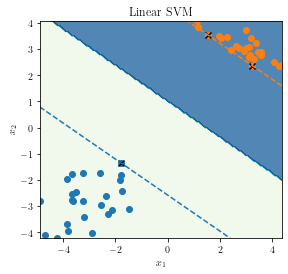

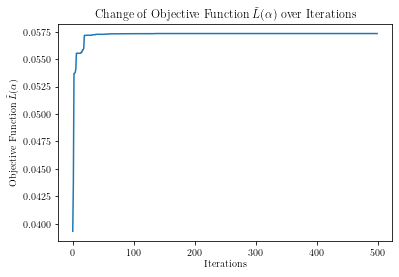

C:\Users\woege\Documents\Uni\2022,2023\SS\trio-diabolo\Computational Intel. UE\homework_3\john cena\HW3_SVM_skeleton.py:134: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal', adjustable='box')


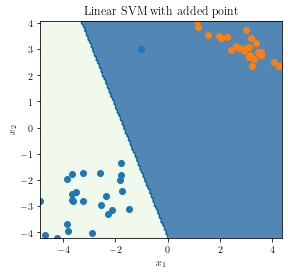

In [ ]:
%run HW3_SVM_skeleton.py

In [162]:
k=4
train_len = 4
test_len = 2
label = np.array([0,1,2,1])
train_data = np.array([[100,1],[2,3],[4,4],[10,10]])
test_data = np.array([[1,2],[0,2]])


label_mx = np.tile(label,[test_len,1])
diff_vec = train_data[None, :] - test_data[:, None]
euc_dist = np.linalg.norm(diff_vec,axis=2)
min_dist = np.argsort(euc_dist)[:,0:k]


print(diff_vec)
x_idx = np.arange(0, test_len)
x_idx = np.repeat(x_idx, k)

y_idx = (min_dist[:,0:k]).flatten()

min_label = label_mx[x_idx,y_idx].reshape(test_len,k)
#stats.mode(min_label,axis=1)[0]
np.count(min_label)


[[[ 99  -1]
  [  1   1]
  [  3   2]
  [  9   8]]

 [[100  -1]
  [  2   1]
  [  4   2]
  [ 10   8]]]


AttributeError: module 'numpy' has no attribute 'count'

In [106]:
data_training = np.loadtxt('HW3_kNN_training.data')
data_test = np.loadtxt('HW3_kNN_test.data')
X_train = data_training[:,0:2]
min_x1 = min(X_train.T[0])
min_x2 = min(X_train.T[1])
max_x1 = max(X_train.T[0])
max_x2 = max(X_train.T[1])
x1_vec = np.arange(min_x1-0.5,max_x1+0.5,0.01)
x2_vec = np.arange(min_x2-0.5,max_x2+0.5,0.01)
x1_vec, x2_vec = np.meshgrid(x1_vec,x2_vec)

np.array([x1_vec.ravel(),x2_vec.ravel()]).T


737
737


(462099, 2)

In [99]:
X_train.T[0]

array([ 0.04621675, -0.8615318 ,  2.31732215,  0.49917063,  0.47807786,
        1.30029169,  1.00943285, -0.70848652,  0.94221979,  0.60649358,
        2.13340007, -2.23498357, -0.30261809,  0.5728933 ,  1.48690982,
        1.28395841,  1.18636092,  2.05144484,  0.70369876,  1.34198601,
        0.49634167,  2.58543263,  1.98370183,  1.45527356,  0.86047338,
       -1.05731005, -1.48139599, -1.14905382, -1.5676454 , -0.40955617,
       -1.40804786,  0.02847996,  0.23482051, -1.59197816,  0.08613261,
        1.05025415,  1.01719576, -0.01384559,  2.38401185,  0.65112197,
        0.58846479, -0.59753343,  0.52346837, -1.15089399, -0.54835469,
       -0.04223135,  1.52238913, -0.54790112,  0.59497444, -1.45443502,
       -0.07662044, -0.32112111, -0.38640125, -0.00681601, -1.02316301,
       -1.57971818,  2.01026747, -1.09414419, -0.49251163,  1.67811374,
        2.66605882,  2.52483369,  2.20575082,  1.7498076 ,  0.26357787,
       -1.94029585,  1.8567208 ,  1.42099228,  1.09221981, -1.15

In [68]:
np.tile(label,[4,1])[[0,0,2],[1,1,3]]

array([1, 1, 1])

In [101]:
numbers = np.arange(0, test_len)
repeated_numbers = np.repeat(numbers, k)
x_idx = repeated_numbers

y_idx = (np.argsort(euc_dist)[:,0:k]).flatten()

min_label = label_mx[x_idx,y_idx].reshape(2,test_len)
stats.mode(min_label,axis=1)[0]
min_label

array([[1, 2],
       [1, 2]])

In [100]:
min_label = np.array([[1,1,1,4],[2,3,4,4],[1,1,2,2]])
stats.mode(min_label,axis=1)[0]

array([[1],
       [4],
       [1]])

In [301]:
for i in range(3):
    print(i)

0
1
2


In [28]:
np.array([[1.], [1.], [2.], [1.], [2.], [0.]])[:,0]


array([1., 1., 2., 1., 2., 0.])

In [63]:
import numpy as np

# Sample matrix
matrix = np.array([[1, 2, 0,0],
                   [2, 2, 2,1],
                   [1, 1, 0,0],[1, 1, 2,0],[1,1, 2, 2],[1,0, 1, 2]])

# Count occurrences of each number in each row
unique_numbers = [0,1,2] # Get the unique numbers in the matrix
counts = np.apply_along_axis(lambda row: np.bincount(row, minlength=len(unique_numbers)), axis=1, arr=matrix)

# Get the element with the highest count for each row
most_frequent_elements = np.argmax(counts, axis=1)

# Perform random choice when there are multiple elements with the same highest count
max_counts = counts.max(axis=1)


candidates = np.where(counts == max_counts[:, np.newaxis])[1]
print(np.where(counts == max_counts[:, np.newaxis]))
random_choices = np.random.choice(candidates, size=matrix.shape[0])
#print(random_choices)

# Get the chosen most frequent elements
#chosen_elements = unique_numbers[most_frequent_elements[random_choices]]

# Print the chosen most frequent elements for each row
#for row, chosen_element in zip(matrix, chosen_elements):
#    print(f"Row: {row}, Most Frequent Element: {chosen_element}")


(array([0, 1, 2, 2, 3, 4, 4, 5], dtype=int64), array([0, 2, 0, 1, 1, 1, 2, 1], dtype=int64))


In [174]:
most_frequent_elements[random_choices]

array([0, 1, 0], dtype=int64)

In [121]:
import numpy as np
from scipy.stats import mode

matrix = np.array([[1, 2, 0, 0],
                   [2, 2, 2, 1],
                   [1, 1, 0, 0],
                   [1, 1, 2, 0],
                   [1, 1, 2, 2],
                   [1, 0, 1, 2]])

modes = []
for row in matrix:
    unique, counts = np.unique(row, return_counts=True)
    max_count = np.max(counts)
    mode_values = unique[counts == max_count]
    mode_val = np.random.choice(mode_values)
    modes.append(mode_val)

modes = np.array(modes).reshape(-1, 1)[:,0].T
print(modes)

[0 2 0 1 1 1]


In [299]:
import numpy as np

# Sample matrix
matrix = np.array([[1, 2, 0, 0],
                   [2, 2, 2, 1],
                   [1, 1, 0, 0],
                   [1, 1, 2, 0],
                   [1, 1, 2, 2],
                   [1, 0, 1, 2]])

# Get the unique numbers in the matrix
unique_numbers = np.unique(matrix)

# Initialize an array to store the most frequent elements for each row
most_frequent_elements = np.zeros(matrix.shape[0], dtype=int)

# Iterate over each row and determine the most frequent element
for i, row in enumerate(matrix):
    counts = np.bincount(row)  # Count occurrences of each number in the row
    max_count = np.max(counts)  # Get the maximum count
    max_indices = np.where(counts == max_count)[0]  # Get the indices of the maximum count
    most_frequent_elements[i] = np.random.choice(unique_numbers[max_indices])

# Print the chosen most frequent elements for each row
for row, chosen_element in zip(matrix, most_frequent_elements):
    print(f"Row: {row}, Most Frequent Element: {chosen_element}")


Row: [1 2 0 0], Most Frequent Element: 0
Row: [2 2 2 1], Most Frequent Element: 2
Row: [1 1 0 0], Most Frequent Element: 1
Row: [1 1 2 0], Most Frequent Element: 1
Row: [1 1 2 2], Most Frequent Element: 2
Row: [1 0 1 2], Most Frequent Element: 1


In [237]:
np.take(unique_numbers, candidates)

array([0, 2, 0, 1, 1, 1, 2, 1])